# Projeto 2 - Ciência dos Dados
- *Objetivo:* Prever uma variável principal em função de demais outras
variáveis que podem influenciar em seu comportamento.
- *Projeto feito por:* Beatriz Borges Zackiewicz, Cameron Swan, Felipe Fuchs, Renato Passarelli

### Bibliotecas e Diretório de Trabalho
---

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

from mpl_toolkits.mplot3d import Axes3D
from IPython.display import display
import seaborn as sns

print('Esperamos trabalhar no diretório')
print(os.getcwd())



Esperamos trabalhar no diretório
c:\Users\renat\OneDrive\Área de Trabalho\projeto 2 cdados\22-2a-cd-p2-grupo_bexcamrefe


---
## Introdução
A época do mês de Janeiro é muito movimentada de fluxo de pessoas em todos os países, devido as festas de fim de ano e período de férias. Assim, o fluxo de voos em aeroportos é aumentado, uma vez que aviões são um dos principais meios de transportes nesse período. Nos Estados Unidos não poderia ser diferente. 
Nosso objetivo com esse estudo é de prever: um voo americano período de Janeiro será cancelado ou não? 

### O Dataset
Para esse estudo, utilizamos um dataset com as principais informações sobre voos nos aeroportos americanos de janeiro de 2019 e 2020.
- *Dataset File:* "Jan_2019_ontime.csv" e "Jan_2020_ontime.csv"
- *Dataset Author:* DIVYANSH AGRAWAL
- *Link para o Dataset:* https://www.kaggle.com/datasets/divyansh22/flight-delay-prediction

#### Informações do Dataset
- **`DAY_OF_MONTH:`** Dia do Mês de Janeiro do voo
- **`DAY_OF_WEEK:`** Dia da semana de Janeiro no voo
- **`OP_UNIQUE_CARRIER:`** Código único da companhia aérea (usado para a suas coligadas)
- ir fazendo isso para todas as colunas do Dataset original....
---


## Nosso Target e Features

Prever: Se um voo americano em Janeiro vai ser cancelado ou não.

**`Target:`** Cancelado ou não --> coluna CANCELLED do dataset

**`Features:`** 
- Cia Aérea (OP_CARRIER)
- Origem (ORIGIN) 
- Destino (DEST)
- Atrasado (DEP_DEL15)
- Distância (DISTANCE)


---
## Importando o DataSet
Importando e Juntando os Datasets dos dois anos em um só, filtrando apenas as features e o target de interesse para o estudo

In [ ]:
# FILTRANDO APENAS DADOS INTERESSANTES
dados_2019 = pd.read_csv('Jan_2019_ontime.csv', sep=',')
# manter: OP_CARRIER, ORIGIN, DESTINATION, CANCELLED, DIVERTED, DISTANCE
Novos_dados_2019 = dados_2019.loc[:,['OP_CARRIER','ORIGIN', 'DEST','CANCELLED','DISTANCE']]
Novos_dados_2019['Ano'] = 2019
Novos_dados_2019.head(5)

,OP_CARRIER,ORIGIN,DEST,CANCELLED,DISTANCE,Ano
0,9E,GNV,ATL,0.0,300.0,2019
1,9E,MSP,CVG,0.0,596.0,2019
2,9E,DTW,CVG,0.0,229.0,2019
3,9E,TLH,ATL,0.0,223.0,2019
4,9E,ATL,FSM,0.0,579.0,2019


In [ ]:
dados_2020 = pd.read_csv('Jan_2020_ontime.csv')
# manter: OP_CARRIER, ORIGIN, DESTINATION, CANCELLED, DIVERTED, DISTANCE
Novos_dados_2020 = dados_2020.loc[:,['OP_CARRIER','ORIGIN', 'DEST','CANCELLED','DISTANCE']]
Novos_dados_2020['Ano'] = 2020
Novos_dados_2020.head(5)

,OP_CARRIER,ORIGIN,DEST,CANCELLED,DISTANCE,Ano
0,EV,ORD,GRB,0.0,174.0,2020
1,EV,TUL,ORD,0.0,585.0,2020
2,EV,EWR,TYS,0.0,631.0,2020
3,EV,BTR,IAH,0.0,253.0,2020
4,EV,RIC,IAH,0.0,1157.0,2020


In [ ]:
General_base  = pd.merge(Novos_dados_2020 , Novos_dados_2019, how = 'outer') # JUNTANDO AS DUAS BASES DE DADOS

General_base ['OP_CARRIER'] = General_base ['OP_CARRIER'].astype('category')
General_base ['ORIGIN'] = General_base ['ORIGIN'].astype('category')
General_base ['DEST'] = General_base ['DEST'].astype('category')
General_base ['CANCELLED'] = General_base ['CANCELLED'].astype('category')



In [ ]:
Comparador = pd.read_csv('Pasta1.csv')
print(Comparador)

   OP_CARRIER                Airline Name
0          Dl             Delta Air Lines
1          AA     American Airlines Cargo
2          WN          Southwest Airlines
3          OO            SkyWest Airlines
4          UA       United Airlines Cargo
5          YX            Midwest Airlines
6          MQ                   Envoy air
7          B6                     JetBlue
8          9E                    Endeavor
9          AS             Alaska Airlines
10         YV               Mesa Airlines
11         NK             Spirit Airlines
12         EV  Atlatic Southeast Airlines
13         F9             FRONTIER FLIGHT
14         G4               Allegiant Air
15         HA           Hawaiian Airlines
16         OH     Comair Delta Connection


In [ ]:
General_base ['OP_CARRIER'].cat.categories = [' Endeavor','American Airlines Cargo','Alaska Airlines','JetBlue','Delta Air Lines','Atlatic Southeast Airlines','Frontier Flight','Allegiant Air','Hawaiian Airlines','Envoy Air','Spirit Airlines','Comair Delta Connection','SkyWest Airlines','United Airlines Cargo','Southwest Airlines','Mesa Airlines','Midwest Airlines']


In [ ]:
Dados_gerais_00 = General_base 
Dados_gerais_00

,OP_CARRIER,ORIGIN,DEST,CANCELLED,DISTANCE,Ano
0,Atlatic Southeast Airlines,ORD,GRB,0.0,174.0,2020
1,Atlatic Southeast Airlines,ORD,GRB,0.0,174.0,2020
2,Atlatic Southeast Airlines,ORD,GRB,0.0,174.0,2020
3,Atlatic Southeast Airlines,ORD,GRB,0.0,174.0,2020
4,Atlatic Southeast Airlines,ORD,GRB,0.0,174.0,2020
...,...,...,...,...,...,...
1191326,United Airlines Cargo,IAH,DTW,0.0,1075.0,2019
1191327,United Airlines Cargo,CVG,ORD,1.0,264.0,2019
1191328,United Airlines Cargo,PSP,ORD,1.0,1652.0,2019
1191329,United Airlines Cargo,ORD,PSP,1.0,1652.0,2019


### Fracionando o Dataset
Uma vez que o nosso Dataset final (unindo 2019 e 2020) possui mais de 1 milhão de voos, precisamos fracionar aleatóriamente ele para podermos rodar todas as iterações necessárias sem quebrar o programa. 

Fracionamos o DataSet em 10%

Além disso também precisamos eliminar os valores nulos do Dataset para não atrapalhar na análise. 

In [ ]:
Dados_gerais_00 = General_base 
Dados_gerais = Dados_gerais_00.sample(frac = 0.01)
rest_Dados_gerais = Dados_gerais_00.drop(Dados_gerais.index)


In [ ]:
Dados_gerais.dropna()

,OP_CARRIER,ORIGIN,DEST,CANCELLED,DISTANCE,Ano
856062,Southwest Airlines,DAL,HOU,0.0,239.0,2019
707381,Atlatic Southeast Airlines,IAH,ELP,0.0,667.0,2019
357646,Southwest Airlines,SFO,SAN,0.0,447.0,2020
345687,Southwest Airlines,PHX,PDX,0.0,1009.0,2020
835697,Southwest Airlines,ATL,GSP,0.0,153.0,2019
...,...,...,...,...,...,...
584365,SkyWest Airlines,IAH,MEM,0.0,468.0,2020
1147253,Frontier Flight,FSD,DEN,0.0,483.0,2019
832744,Envoy Air,ORD,PIA,0.0,130.0,2019
523896,Alaska Airlines,LAX,PDX,0.0,834.0,2020


In [ ]:
# CHECANDO SE TEMOS VALORES NULOS
Cancelados = Dados_gerais[Dados_gerais['CANCELLED'] == 1.0]
Nao_cancelados = Dados_gerais[Dados_gerais['CANCELLED'] == 0.0]

print(Cancelados.isnull().sum())
print(len(Cancelados))
print(Nao_cancelados.isnull().sum())
print(len(Nao_cancelados))
# --> está certo, resultados esperados pois voos cancelados não atrasam e não cancelados podem ainda assim atrasar.


OP_CARRIER    0
ORIGIN        0
DEST          0
CANCELLED     0
DISTANCE      0
Ano           0
dtype: int64
213
OP_CARRIER    0
ORIGIN        0
DEST          0
CANCELLED     0
DISTANCE      0
Ano           0
dtype: int64
11700


,count,mean,std,min,25%,50%,75%,max
CANCELLED,,,,,,,,
0.0,11700.0,793.876,584.914,31.0,364.0,641.0,1029.0,5095.0
1.0,213.0,632.638,473.876,45.0,280.0,528.0,867.0,2777.0


,count,mean,std,min,25%,50%,75%,max
CANCELLED,,,,,,,,
True,213.0,632.638,473.876,45.0,280.0,528.0,867.0,2777.0


,count,mean,std,min,25%,50%,75%,max
CANCELLED,,,,,,,,
False,11700.0,793.876,584.914,31.0,364.0,641.0,1029.0,5095.0


Text(0, 0.5, 'Frequência absoluta')

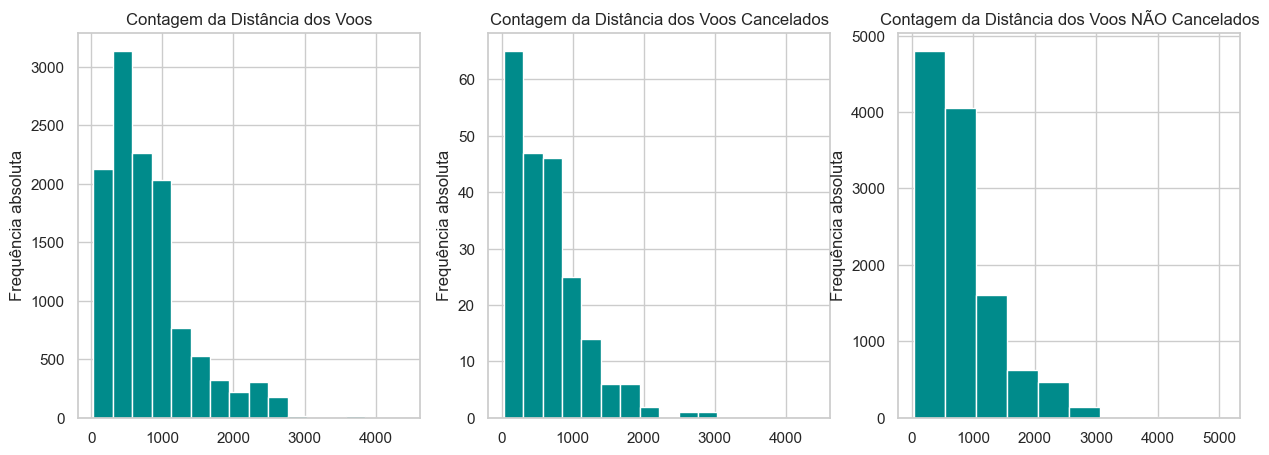

In [ ]:
# Nosso Target --> qualitativo (SIM/NÃO --> 1.0/0.0 --> CANCELADO/NÃO CANCELADO), por isso temos que 
# Estudar as relações com base em gráficos de QualitativasXQuantitativas e QualitativasXQualitativas

# CANCELADOS X DISTANCIA --> único caso qualixquant do nosso df
display(Dados_gerais.groupby(by= [Dados_gerais.CANCELLED]).DISTANCE.describe().round(3))
display(Cancelados.groupby(by= [Cancelados.CANCELLED == 1.0]).DISTANCE.describe().round(3))
display(Nao_cancelados.groupby(by= [Nao_cancelados.CANCELLED == 1.0]).DISTANCE.describe().round(3))

amplitude = Dados_gerais.DISTANCE.max()-Dados_gerais.DISTANCE.min()
amplitude_faixa= amplitude/ 10
faixa= np.arange(30, 5100.0, amplitude_faixa )

amplitude_cancelados = Cancelados.DISTANCE.max()-Cancelados.DISTANCE.min()
amplitude_faixa_cancelados = amplitude_cancelados / 10
faixa_canc = np.arange(30, 4480.0, amplitude_faixa_cancelados )

amplitude_nao_cancelados = Nao_cancelados.DISTANCE.max()-Nao_cancelados.DISTANCE.min()
amplitude_faixa_nao_cancelados = amplitude_nao_cancelados / 10
faixa_nao_canc = np.arange(30, 5100.0, amplitude_faixa_nao_cancelados )


plt.figure(figsize=(15, 5))
# GRÁFICO DA DISTÂNCIA POR VOO
plt.subplot(131)
plt.hist(Dados_gerais.DISTANCE, bins=faixa_canc, color='darkcyan', edgecolor='white')
plt.title('Contagem da Distância dos Voos')
plt.ylabel('Frequência absoluta')
# GRÁFICO CANCELADOS
plt.subplot(132)
plt.hist(Cancelados.DISTANCE, bins=faixa_canc, color='darkcyan', edgecolor='white')
plt.title('Contagem da Distância dos Voos Cancelados')
plt.ylabel('Frequência absoluta')
# GRÁFICO NÃO CANCELADOS
plt.subplot(133)
plt.hist(Nao_cancelados.DISTANCE, bins=faixa_nao_canc, color='darkcyan', edgecolor='white')
plt.title('Contagem da Distância dos Voos NÃO Cancelados')
plt.ylabel('Frequência absoluta')



CANCELLED,0.0,1.0
OP_CARRIER,,
Envoy Air,94.5,5.5
Atlatic Southeast Airlines,95.9,4.1
Allegiant Air,97.3,2.7
SkyWest Airlines,97.3,2.7
Southwest Airlines,97.5,2.5
JetBlue,97.8,2.2
Midwest Airlines,97.8,2.2
All,98.2,1.8
Mesa Airlines,98.4,1.6


None


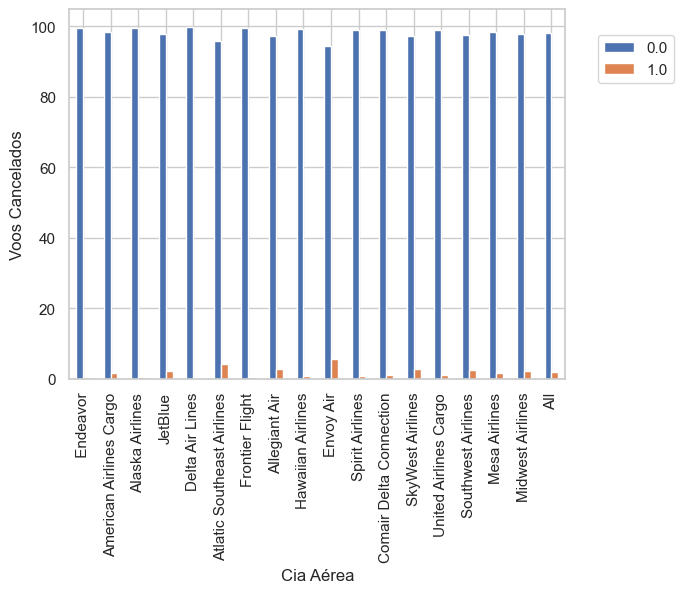

CANCELLED,0.0,1.0
DEST,,
DVL,0.0,100.0
SUN,50.0,50.0
OGS,50.0,50.0
MQT,50.0,50.0
LAW,50.0,50.0
MHK,66.7,33.3
SPI,66.7,33.3
MDT,66.7,33.3
PIA,75.0,25.0


None


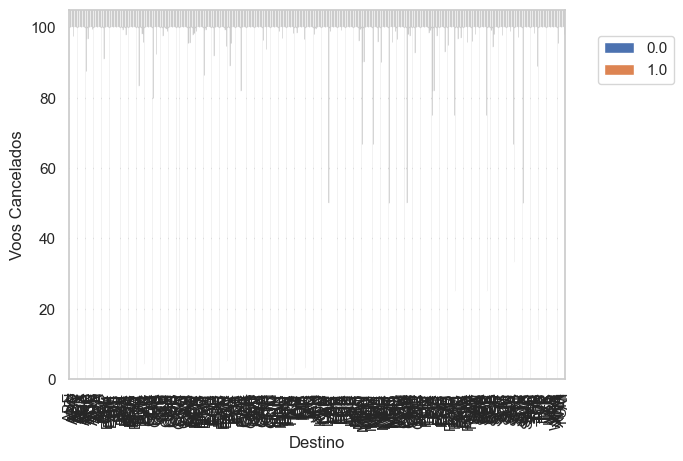

CANCELLED,0.0,1.0
ORIGIN,,
OGS,0.0,100.0
JMS,0.0,100.0
MKG,0.0,100.0
SUN,50.0,50.0
HIB,50.0,50.0
VEL,50.0,50.0
SPS,66.7,33.3
AZO,75.0,25.0
TVC,80.0,20.0


None


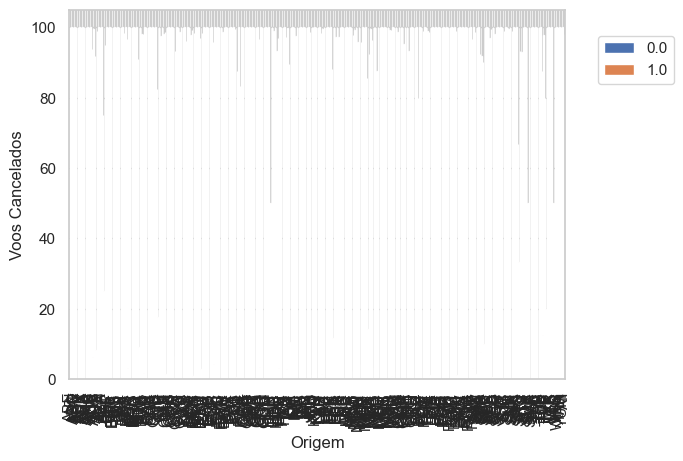

In [ ]:
# CRUZAMENTO DE QUALITATIVAS CM QUALITATIVAS
# FAZER TABELA DE FREQUENCIAS + GRÁFICOS DE BARRA
# PLOTAR UM AO LADO DO OUTRO SE POSSÍVEL
# Cia X Cancelados
cia_canc = pd.crosstab(Dados_gerais['OP_CARRIER'], Dados_gerais['CANCELLED'],  normalize='index', margins=True).round(3)*100
cia_canc__ordenado = cia_canc.sort_values(0.0)
print(display(cia_canc__ordenado.head(15)))
cia_canc.plot.bar()
plt.ylabel('Voos Cancelados')
plt.xlabel('Cia Aérea')
plt.legend(loc='center')
plt.legend(bbox_to_anchor=(1.05, 0.95)); # Coloca legenda para fora da janela gráfica
plt.show()

# Destino X Cancelados
dest_canc = pd.crosstab(Dados_gerais['DEST'], Dados_gerais['CANCELLED'], normalize='index',margins=True).round(3)*100
dest_canc_ordenado = dest_canc.sort_values(0.0)
print(display(dest_canc_ordenado.head(35)))
dest_canc.plot.bar()
plt.ylabel('Voos Cancelados')
plt.xlabel('Destino')
plt.legend(loc='center')
plt.legend(bbox_to_anchor=(1.05, 0.95)); # Coloca legenda para fora da janela gráfica
plt.show()

# Origem X Cancelados
org_canc = pd.crosstab(Dados_gerais['ORIGIN'], Dados_gerais['CANCELLED'], normalize='index',margins=True).round(3)*100
org_canc_ordenado = org_canc.sort_values(0.0)
print(display(org_canc_ordenado.head(35)))
org_canc.plot.bar()
plt.ylabel('Voos Cancelados')
plt.xlabel('Origem')
plt.legend(loc='center')
plt.legend(bbox_to_anchor=(1.05, 0.95)); # Coloca legenda para fora da janela gráfica
plt.show()



In [ ]:
# TESTE QUI-QUADRADO DE PEARSON - teste de independência entre variáveis ​​categóricas
# adotando alfa de significancia = 5% (0.05)
from scipy.stats import chi2_contingency
alpha = 0.05

# Dependendia do status do voo X CIA AREA 
stat, pcia, dof, expected = chi2_contingency(cia_canc)
print("p cia value is " + str(pcia))
if pcia <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independente da CIA aérea')

# Dependendia do status do voo X DESTINO
stat, pdest, dof, expected = chi2_contingency(dest_canc)
print("p dest value is " + str(pdest))
if pdest <= alpha:
    print('Destino é Dependente')
else:
    print('Independente do DESTINO')

# Dependendia do status do voo X ORIGEM
stat, porg, dof, expected = chi2_contingency(org_canc)
print("p dest value is " + str(porg))
if porg <= alpha:
    print('Dependente da Origem')
else:
    print('Independente da Origem')

p cia value is 0.32917103566739336
Independente da CIA aérea
p dest value is 0.0
Destino é Dependente
p dest value is 0.0
Dependente da Origem


MONTANDO O MODELO PREDITIVO
- aqui sim temos que dividir em uma parte de treinamento

In [ ]:
Dados_gerais_00 = Dados_gerais 
Dados_gerais = Dados_gerais_00.sample(frac = 0.1)
# Creating dataframe with
# rest of the 50% values
rest_Dados_gerais = Dados_gerais_00.drop(Dados_gerais.index)

In [ ]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

Dados_gerais = Dados_gerais.dropna()
Dados_gerais.head(5)

,OP_CARRIER,ORIGIN,DEST,CANCELLED,DISTANCE,Ano
443316,SkyWest Airlines,BOI,SFO,0.0,522.0,2020
439287,SkyWest Airlines,DEN,COS,0.0,73.0,2020
131305,American Airlines Cargo,BOS,CLT,0.0,728.0,2020
939302,Atlatic Southeast Airlines,EWR,DAY,0.0,533.0,2019
633416,American Airlines Cargo,BWI,DFW,0.0,1217.0,2019


In [ ]:
cat_vars = ['OP_CARRIER','ORIGIN', 'DEST']
for var in cat_vars:
    cat_list = 'var' + '_' + var
    cat_list = pd.get_dummies(Dados_gerais[var],prefix = var)
    Dados_gerais = Dados_gerais.join(cat_list)
     
data_vars=Dados_gerais.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]

In [ ]:
data_final=Dados_gerais[to_keep]
data_final.columns.values

array(['CANCELLED', 'DISTANCE', 'Ano', 'OP_CARRIER_ Endeavor',
       'OP_CARRIER_American Airlines Cargo', 'OP_CARRIER_Alaska Airlines',
       'OP_CARRIER_JetBlue', 'OP_CARRIER_Delta Air Lines',
       'OP_CARRIER_Atlatic Southeast Airlines',
       'OP_CARRIER_Frontier Flight', 'OP_CARRIER_Allegiant Air',
       'OP_CARRIER_Hawaiian Airlines', 'OP_CARRIER_Envoy Air',
       'OP_CARRIER_Spirit Airlines', 'OP_CARRIER_Comair Delta Connection',
       'OP_CARRIER_SkyWest Airlines', 'OP_CARRIER_United Airlines Cargo',
       'OP_CARRIER_Southwest Airlines', 'OP_CARRIER_Mesa Airlines',
       'OP_CARRIER_Midwest Airlines', 'ORIGIN_ABE', 'ORIGIN_ABI',
       'ORIGIN_ABQ', 'ORIGIN_ABR', 'ORIGIN_ABY', 'ORIGIN_ACT',
       'ORIGIN_ACV', 'ORIGIN_ACY', 'ORIGIN_ADK', 'ORIGIN_ADQ',
       'ORIGIN_AEX', 'ORIGIN_AGS', 'ORIGIN_ALB', 'ORIGIN_ALO',
       'ORIGIN_AMA', 'ORIGIN_ANC', 'ORIGIN_APN', 'ORIGIN_ART',
       'ORIGIN_ASE', 'ORIGIN_ATL', 'ORIGIN_ATW', 'ORIGIN_ATY',
       'ORIGIN_AUS', 'ORIGIN_

In [ ]:
data_final

,CANCELLED,DISTANCE,Ano,OP_CARRIER_ Endeavor,OP_CARRIER_American Airlines Cargo,OP_CARRIER_Alaska Airlines,OP_CARRIER_JetBlue,OP_CARRIER_Delta Air Lines,OP_CARRIER_Atlatic Southeast Airlines,OP_CARRIER_Frontier Flight,...,DEST_UIN,DEST_USA,DEST_VEL,DEST_VLD,DEST_VPS,DEST_WRG,DEST_XNA,DEST_XWA,DEST_YAK,DEST_YUM
443316,0.0,522.0,2020,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
439287,0.0,73.0,2020,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
131305,0.0,728.0,2020,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
939302,0.0,533.0,2019,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
633416,0.0,1217.0,2019,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
624988,0.0,280.0,2019,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
554830,0.0,479.0,2020,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
854311,0.0,721.0,2019,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
54567,0.0,231.0,2020,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
linhas = len(data_final)
col=726
b=0
while b < col:
    if b<col:
        nome = data_final.columns[b]
        a = 0
        sum = 0
        while a<linhas:
            sum+=data_final.iloc[a,b]
            a+=1
        
        print(nome)
        print(sum)
        if sum < 20 and nome!= "CANCELLED":
            data_final = data_final.drop(nome, axis=1)
            b+=-1
            col+=-1
        b+=1
        
data_sem_zero = data_final

CANCELLED
18.0
DISTANCE
950214.0
Ano
2405217
OP_CARRIER_ Endeavor
37
OP_CARRIER_American Airlines Cargo
150
OP_CARRIER_Alaska Airlines
48
OP_CARRIER_JetBlue
34
OP_CARRIER_Delta Air Lines
164
OP_CARRIER_Atlatic Southeast Airlines
29
OP_CARRIER_Frontier Flight
21
OP_CARRIER_Allegiant Air
16
OP_CARRIER_Hawaiian Airlines
15
OP_CARRIER_Envoy Air
50
OP_CARRIER_Spirit Airlines
36
OP_CARRIER_Comair Delta Connection
59
OP_CARRIER_SkyWest Airlines
115
OP_CARRIER_United Airlines Cargo
112
OP_CARRIER_Southwest Airlines
222
OP_CARRIER_Mesa Airlines
35
OP_CARRIER_Midwest Airlines
48
ORIGIN_ABE
0
ORIGIN_ABI
2
ORIGIN_ABQ
5
ORIGIN_ABR
0
ORIGIN_ABY
0
ORIGIN_ACT
0
ORIGIN_ACV
0
ORIGIN_ACY
0
ORIGIN_ADK
0
ORIGIN_ADQ
0
ORIGIN_AEX
0
ORIGIN_AGS
0
ORIGIN_ALB
3
ORIGIN_ALO
0
ORIGIN_AMA
0
ORIGIN_ANC
2
ORIGIN_APN
0
ORIGIN_ART
0
ORIGIN_ASE
0
ORIGIN_ATL
67
ORIGIN_ATW
0
ORIGIN_ATY
0
ORIGIN_AUS
7
ORIGIN_AVL
1
ORIGIN_AVP
0
ORIGIN_AZA
1
ORIGIN_AZO
1
ORIGIN_BDL
13
ORIGIN_BET
0
ORIGIN_BFF
1
ORIGIN_BFL
0
ORIGIN_BFM
0
ORIGIN

In [ ]:
data_final=data_sem_zero
data_final

,CANCELLED,DISTANCE,Ano,OP_CARRIER_ Endeavor,OP_CARRIER_American Airlines Cargo,OP_CARRIER_Alaska Airlines,OP_CARRIER_JetBlue,OP_CARRIER_Delta Air Lines,OP_CARRIER_Atlatic Southeast Airlines,OP_CARRIER_Frontier Flight,...,DEST_IAH,DEST_LAS,DEST_LAX,DEST_LGA,DEST_MCO,DEST_MSP,DEST_ORD,DEST_PHX,DEST_SFO,DEST_SLC
443316,0.0,522.0,2020,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
439287,0.0,73.0,2020,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
131305,0.0,728.0,2020,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
939302,0.0,533.0,2019,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
633416,0.0,1217.0,2019,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
624988,0.0,280.0,2019,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
554830,0.0,479.0,2020,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
854311,0.0,721.0,2019,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
54567,0.0,231.0,2020,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
linhas = len(data_final)
col=54
b=0
while b < col:
    if b<col:
        nome = data_final.columns[b]
        a = 0
        sum = 0
        while a<linhas:
            sum+=data_final.iloc[a,b]
            a+=1
        print(sum)
        if sum < 20 and nome!= "CANCELLED":
            data_final = data_final.drop(nome, axis=1)
            b+=-1
            col+=-1
        b+=1
        

18.0
950214.0
2405217
37
150
48
34
164
29
21
50
36
59
115
112
222
35
48
67
44
23
33
48
24
27
31
24
29
38
21
25
51
24
26
28
20
69
34
24
44
48
32
28
22
34
26
35
25
21
25
48
33
34
25


In [ ]:
X = data_final.loc[:, data_final.columns != 'CANCELLED']
y = data_final.loc[:, data_final.columns == 'CANCELLED']

In [ ]:
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns
os_data_X,os_data_y= os.fit_resample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['CANCELLED'])
# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of no subscription in oversampled data",len(os_data_y[os_data_y['CANCELLED']==0]))
print("Number of subscription",len(os_data_y[os_data_y['CANCELLED']==1]))
print("Proportion of no subscription data in oversampled data is ",len(os_data_y[os_data_y['CANCELLED']==0])/len(os_data_X))
print("Proportion of subscription data in oversampled data is ",len(os_data_y[os_data_y['CANCELLED']==1])/len(os_data_X))

length of oversampled data is  1632
Number of no subscription in oversampled data 816
Number of subscription 816
Proportion of no subscription data in oversampled data is  0.5
Proportion of subscription data in oversampled data is  0.5


In [ ]:
data_final_vars=data_final.columns.values.tolist()
y=['y']
X=[i for i in data_final_vars if i not in y]
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
rfe = RFE(logreg, step = 20)
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

[False False  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True False False  True False False False
  True False  True  True False False False  True False False False  True
 False False False  True False False  True False  True False False  True
 False False False False False]
[3 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 3 1 2 3 2 1 3 1 1 3 3 3 1 3 3 3 1 3
 3 3 1 2 3 1 2 1 3 3 1 3 2 3 2 3]


c:\Users\renat\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
Name_list=[]
for i in range(len(rfe.support_)):
    teste = rfe.support_[i]
    nome = data_final.columns[i]
    if teste == True:
        Name_list.append(nome)
X=os_data_X[Name_list]
y=os_data_y['CANCELLED']

In [ ]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit(method='bfgs')
print(result.summary2())

         Current function value: 0.208883
         Iterations: 35
         Function evaluations: 49
         Gradient evaluations: 49
                                     Results: Logit
Model:                       Logit                    Pseudo R-squared:         0.699   
Dependent Variable:          CANCELLED                AIC:                      733.7948
Date:                        2022-11-28 11:58         BIC:                      874.1314
No. Observations:            1632                     Log-Likelihood:           -340.90 
Df Model:                    25                       LL-Null:                  -1131.2 
Df Residuals:                1606                     LLR p-value:              0.0000  
Converged:                   0.0000                   Scale:                    1.0000  
----------------------------------------------------------------------------------------
                                       Coef.   Std.Err.    z     P>|z|   [0.025   0.975]
-------------

c:\Users\renat\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.90


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
certos=confusion_matrix[0][0]+confusion_matrix[1][1]
errados=confusion_matrix[0][1]+confusion_matrix[1][0]
print(confusion_matrix)

print(f'Temos {certos} predições certas')
print(f'Temos {errados} predições erradas')

[[235  10]
 [ 40 205]]
Temos 440 predições certas
Temos 50 predições erradas


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.85      0.96      0.90       245
         1.0       0.95      0.84      0.89       245

    accuracy                           0.90       490
   macro avg       0.90      0.90      0.90       490
weighted avg       0.90      0.90      0.90       490



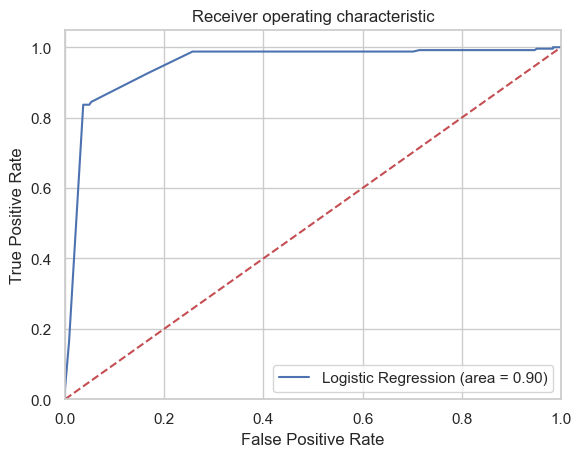

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

MODELO DE PREDIÇÃO - RESULTADOS

VALIDAÇÃO DOS RESULTADOS

In [ ]:
# código de validação de resultados 